In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

596

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94fb3c66a49ff5227c73360f102dffa9


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete. 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | ulladulla
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | kaitangata
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | mrirt
City not found. Skipping...
Processing Record 18 of Set 1 | broken hill
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | vaini
Pro

Processing Record 33 of Set 4 | prescott
Processing Record 34 of Set 4 | georgetown
Processing Record 35 of Set 4 | sao domingos
Processing Record 36 of Set 4 | sainte-rose
Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | aban
City not found. Skipping...
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | camana
City not found. Skipping...
Processing Record 41 of Set 4 | meulaboh
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | ornskoldsvik
Processing Record 44 of Set 4 | bathsheba
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | esil
Processing Record 47 of Set 4 | varzea da palma
Processing Record 48 of Set 4 | kismayo
City not found. Skipping...
Processing Record 49 of Set 4 | novoagansk
Processing Record 50 of Set 4 | alanya
Processing Record 1 of Set 5 | san quintin
Processing Record 2 of Set 5 | lebedinyy
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | clyde ri

Processing Record 21 of Set 8 | lodeynoye pole
Processing Record 22 of Set 8 | pedernales
Processing Record 23 of Set 8 | nazareno etla
Processing Record 24 of Set 8 | agadez
Processing Record 25 of Set 8 | meadow lake
Processing Record 26 of Set 8 | olga
Processing Record 27 of Set 8 | acapulco
Processing Record 28 of Set 8 | almaznyy
Processing Record 29 of Set 8 | anadyr
Processing Record 30 of Set 8 | udachnyy
Processing Record 31 of Set 8 | yerbogachen
Processing Record 32 of Set 8 | inzer
Processing Record 33 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 8 | oro valley
Processing Record 35 of Set 8 | naftah
City not found. Skipping...
Processing Record 36 of Set 8 | samarai
Processing Record 37 of Set 8 | dwarka
Processing Record 38 of Set 8 | roma
Processing Record 39 of Set 8 | evensk
Processing Record 40 of Set 8 | orange cove
Processing Record 41 of Set 8 | ust-ordynskiy
Processing Record 42 of Set 8 | belokurikha
Processing Record 43 of Set 8 | 

Processing Record 10 of Set 12 | bhor
Processing Record 11 of Set 12 | beringovskiy
Processing Record 12 of Set 12 | carbondale
Processing Record 13 of Set 12 | deputatskiy
Processing Record 14 of Set 12 | arman
Processing Record 15 of Set 12 | bud
Processing Record 16 of Set 12 | selty
Processing Record 17 of Set 12 | george
Processing Record 18 of Set 12 | ayan
Processing Record 19 of Set 12 | savalou
Processing Record 20 of Set 12 | kerema
Processing Record 21 of Set 12 | shingu
Processing Record 22 of Set 12 | mali
Processing Record 23 of Set 12 | sainte-anne-des-monts
Processing Record 24 of Set 12 | narkevychi
Processing Record 25 of Set 12 | bull savanna
Processing Record 26 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 27 of Set 12 | santa fe
Processing Record 28 of Set 12 | bereda
Processing Record 29 of Set 12 | casablanca
Processing Record 30 of Set 12 | druzhba
Processing Record 31 of Set 12 | ereymentau
Processing Record 32 of Set 12 | filingue
Proce

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2019-10-22 20:31:29,77.48,-69.36,11.26,45,100,9.82
1,Punta Arenas,CL,2019-10-22 20:31:30,-53.16,-70.91,53.60,46,75,25.28
2,Paamiut,GL,2019-10-22 20:31:30,61.99,-49.67,36.81,64,85,4.90
3,Ulladulla,AU,2019-10-22 20:31:30,-35.36,150.48,55.99,100,0,5.82
4,Bredasdorp,ZA,2019-10-22 20:31:30,-34.53,20.04,59.00,71,71,2.21
5,Barrow,AR,2019-10-22 20:31:31,-38.31,-60.23,50.32,85,100,14.05
6,Sitka,US,2019-10-22 20:31:31,37.17,-99.65,66.99,22,0,8.01
7,Avarua,CK,2019-10-22 20:27:36,-21.21,-159.78,78.80,78,35,2.24
8,Airai,TL,2019-10-22 20:31:31,-8.93,125.41,64.31,34,70,4.88
9,Albany,US,2019-10-22 20:29:31,42.65,-73.75,60.01,72,90,5.82


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time 
# Get today's date in seconds. 
today = time.time()
today

1571776534.850656

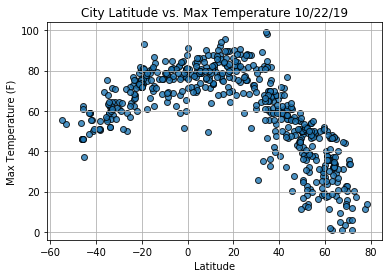

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

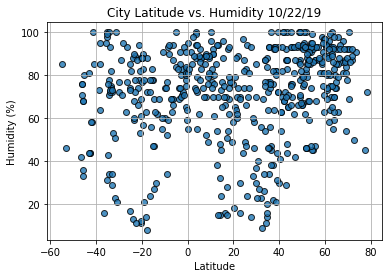

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

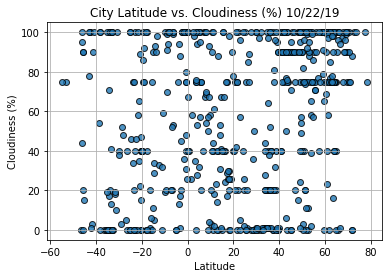

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

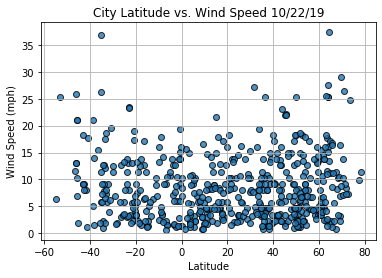

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [17]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {r_value:.3f}")
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [19]:
index13 = city_data_df.loc[13]
index13

City              Bambous Virieux
Country                        MU
Date          2019-10-22 20:31:32
Lat                        -20.34
Lng                         57.76
Max Temp                       72
Humidity                       88
Cloudiness                     40
Wind Speed                   3.36
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
535    False
536     True
537    False
538     True
539     True
Name: Lat, Length: 540, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2019-10-22 20:31:29,77.48,-69.36,11.26,45,100,9.82
2,Paamiut,GL,2019-10-22 20:31:30,61.99,-49.67,36.81,64,85,4.90
6,Sitka,US,2019-10-22 20:31:31,37.17,-99.65,66.99,22,0,8.01
9,Albany,US,2019-10-22 20:29:31,42.65,-73.75,60.01,72,90,5.82
11,Kapaa,US,2019-10-22 20:31:32,22.08,-159.32,82.40,74,20,13.87
...,...,...,...,...,...,...,...,...,...
527,Lardos,GR,2019-10-22 20:35:16,36.09,28.02,73.99,56,20,3.24
532,Wharton,GB,2019-10-22 20:35:17,53.20,-2.51,50.00,87,95,2.24
536,Nyurba,RU,2019-10-22 20:35:18,63.29,118.35,18.68,89,98,4.16
538,Panaba,MX,2019-10-22 20:35:19,21.28,-88.27,79.70,88,100,8.19


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n 
                        for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-24-0fffe5e0d45d>, line 6)

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n 
                        for % Humidity', '% Humidity',(40,10))

SyntaxError: EOL while scanning string literal (<ipython-input-27-10b26ad1521b>, line 6)

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n 
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-28-6f4cd0642ead>, line 6)

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n
                    for % Cloudiness', '% Cloudiness',(10,55))

SyntaxError: EOL while scanning string literal (<ipython-input-32-14e960679763>, line 6)

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n 
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-33-b6e71349229d>, line 6)

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n 
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-34-93b8a3f812d8>, line 6)

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n 
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-35-7bc07573015c>, line 6)